# R 기반 텍스트 마이닝(KoNLP)
- `install.packages("KoNLP")" 로 설치가 바로 안되므로, 아래 순서대로 수동 설치 필요
  - https://www.youtube.com/watch?v=upukwMgPY28&ab_channel=%EC%86%A1%EC%8A%B9%EB%AF%BC%EC%9D%98%ED%8A%B9%EC%88%98%EA%B5%90%EC%9C%A1 영상 참고
```
1. R 설치하기(가급적 관리자 권한으로 설치)
https://ftp.harukasan.org/CRAN/

2. R Studio 설치하기(가급적 관리자 권한으로 설치)
https://rstudio.com/products/rstudio/...

3. rtools40 설치하기(c:/Rtools에 설치)
https://cran.r-project.org/bin/window...

4. java, rJava 설치하기
install.packages("multilinguer")
library(multilinguer)
install_jdk()

5. 의존성 패키지 설치하기
install.packages(c("hash", "tau", "Sejong", "RSQLite", "devtools", "bit", "rex", "lazyeval", "htmlwidgets", "crosstalk", "promises", "later", "sessioninfo", "xopen", "bit64", "blob", "DBI", "memoise", "plogr", "covr", "DT", "rcmdcheck", "rversions"), type = "binary")

6. github 버전 설치하기
install.packages("remotes")

7. KoNLP 설치하기(64bit에서만 동작)
remotes::install_github('haven-jeon/KoNLP', upgrade = "never", INSTALL_opts=c("--no-multiarch"))

8. 단어 사전 추가하기 
mergeUserDic(data.frame(c("강남대"), c("ncn")))
```

Backup was just finished!
370957 words dictionary was built.
629898 words dictionary was built.


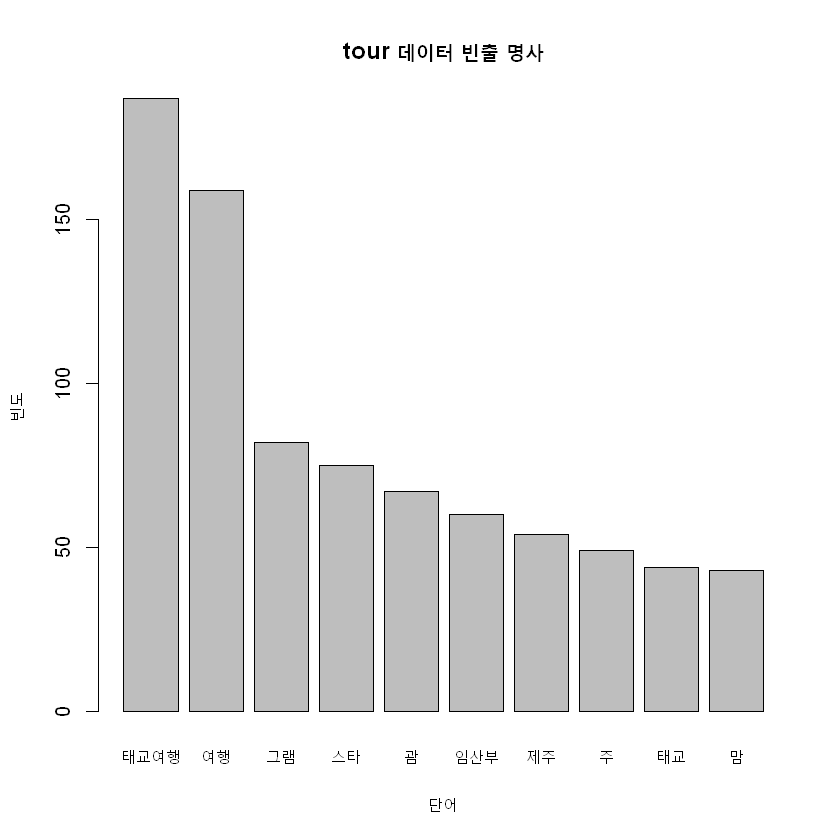

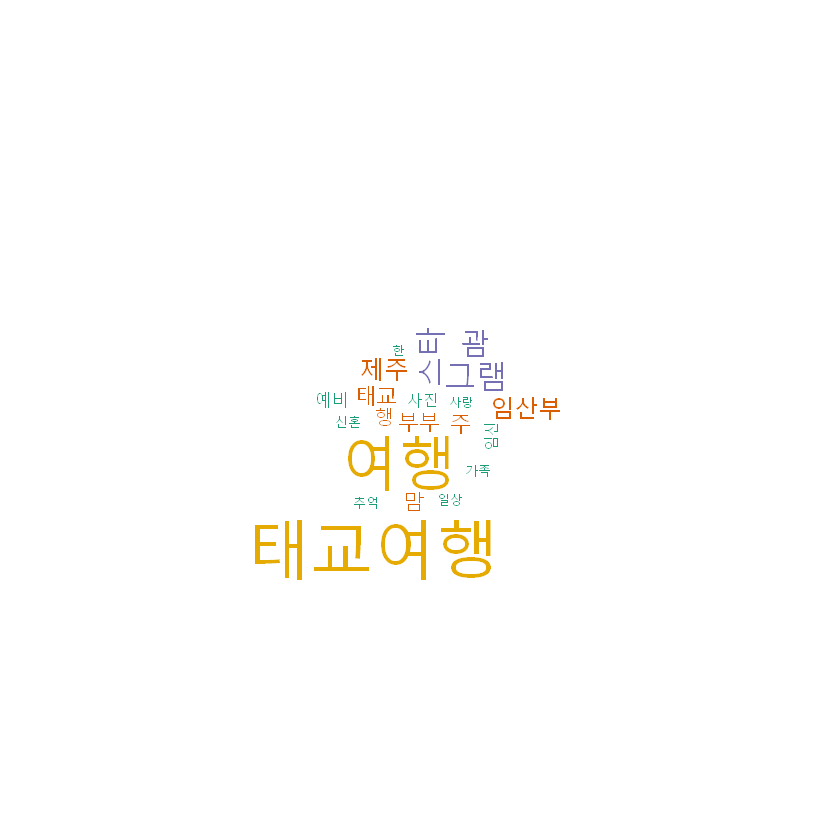

In [3]:
###################################################################################
#                      3. 비정형 데이터마이닝 (사용 데이터 : "instagram_태교여행")
###################################################################################

#---------------------------------------------------------------------------
# Q1) ‘instagram_태교여행.txt’ 데이터를 읽어온 뒤 숫자, 특수 문자 등을 
#     제거하는 전처리 작업을 시행하시오.
#---------------------------------------------------------------------------

library(tm)
library(rJava)
library(KoNLP)
library(wordcloud)
library(plyr)
library(stringr)

useSejongDic()

instagram_tour <- readLines("./data/instagram_태교여행.txt")

# print(instagram_tour)

#데이터 전처리
clean_txt <- function(txt){
  txt <- tolower(txt)             # 대, 소문자 변환
  txt <- removePunctuation(txt)   # 구두점 제거
  txt <- removeNumbers(txt)       # 숫자 제거
  txt <- stripWhitespace(txt)     # 공백제거
  
  return(txt)
}

tour_1 <- clean_txt(instagram_tour)

# print(tour_1)

#---------------------------------------------------------------------------
# Q2) 전처리된 데이터에서 “태교여행”이란 단어를 사전에 추가하고 명사를 추출해 
#     출현빈도 10위까지 막대그래프로 시각화하시오. 
#---------------------------------------------------------------------------

buildDictionary(ext_dic = "woorimalsam", user_dic=data.frame(c("태교여행"),"ncn"),replace_usr_dic = T)

tour1<-sapply(tour_1,extractNoun)

table.cnoun<-head(sort(table(unlist(tour1)),decreasing=T),10)

barplot(table.cnoun, main="tour 데이터 빈출 명사", 
        xlab="단어",
        ylab="빈도")

# 3) 전처리된 데이터를 이용해 워드클라우드를 작성하고 인사이트를 추출하시오.

result<-data.frame(sort(table(unlist(tour1)),decreasing=T))

t<-wordcloud(result$Var1,result$Freq,color=brewer.pal(6,"Dark2"),min.freq=20)



In [4]:
raw_text <- readLines("./data/korean/text_moon.txt", encoding = "UTF-8")

head(raw_text)

# 불필요 문자 제거
library(stringr)

text <- '가나다라뜛꽯꽓 1234 !@# this is test Structures... okok'

text.2 <- str_replace_all(string = text, pattern = "[^가-힣]", replacement = " ")

# 연속된 공백 제거
text.3 <- str_squish(text.2)

text.3

# 전처리 작업 한번에 하기
library(dplyr)
text.4 <- raw_text %>% 
        str_replace_all(pattern = "[^가-힣]", replacement = " ") %>%
        str_squish() %>%
        as_tibble()
            
#text.4




[1] "정권교체 하겠습니다!" ""                     "정치교체 하겠습니다!"
[4] ""                     "시대교체 하겠습니다!" ""

[1] "가나다라뜛꽯꽓"

Warning message:
"package 'dplyr' was built under R version 4.0.5"

Attaching package: 'dplyr'


The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




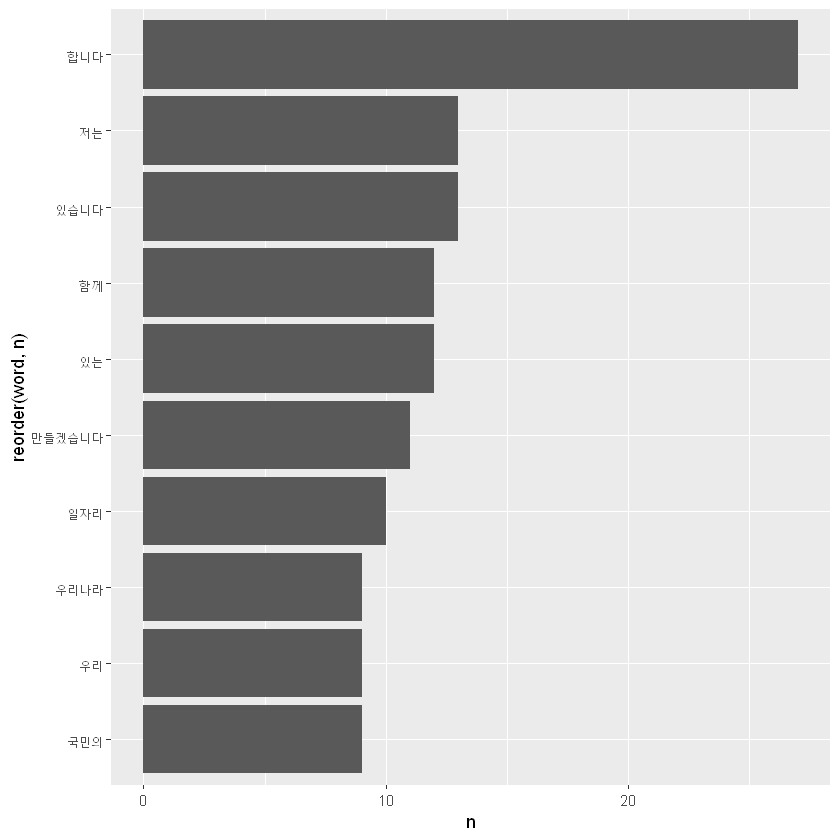

In [43]:
# 텍스트 토큰화

library(tidytext)

# 반드시 tibble 타입을 넣어줘야함
words <- text.4 %>%
        unnest_tokens(
            input = value
            , output = word
            , token = "words"
        )

#words

# 단어 빈도 구하기, 소팅 처리, 단어 1개 초과만 필터링 해서 이용, 상위 10개 추출
top10 <- words %>% count(word, sort = T) %>% filter(str_count(word) > 1) %>% head(10)

library(ggplot2)

ggplot(top10, aes(x = reorder(word, n), y = n)) +
    geom_col() +
    coord_flip()